# Regression Analysis

This notebook performs regression analysis on housing data to predict house prices using size, number of rooms, and location.

## 1.  Dataset Selection
We use `housing_train.csv` with the following relevant columns:
- `Landsize` → Size
- `Location` → Location
- `Rooms` → Number of Rooms
- `Price` → Target Variable

## 2.1   Load and Explore
### Inspect the Dataset

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("housing_train.csv")

# Filter only required columns
df = df[['Landsize', 'Location', 'Rooms', 'Price']]
df.head()

,Landsize,Location,Rooms,Price
0,495.0,Suburban,3,1650000
1,961.0,Suburban,5,791000
2,185.0,Suburban,3,785000
3,NaN,Suburban,2,755000
4,757.0,Suburban,5,2500000


In [46]:
# Check for missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7536 entries, 0 to 7535
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Landsize  5972 non-null   float64
 1   Location  7536 non-null   object 
 2   Rooms     7536 non-null   int64  
 3   Price     7536 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 235.6+ KB


Landsize    1564
Location       0
Rooms          0
Price          0
dtype: int64

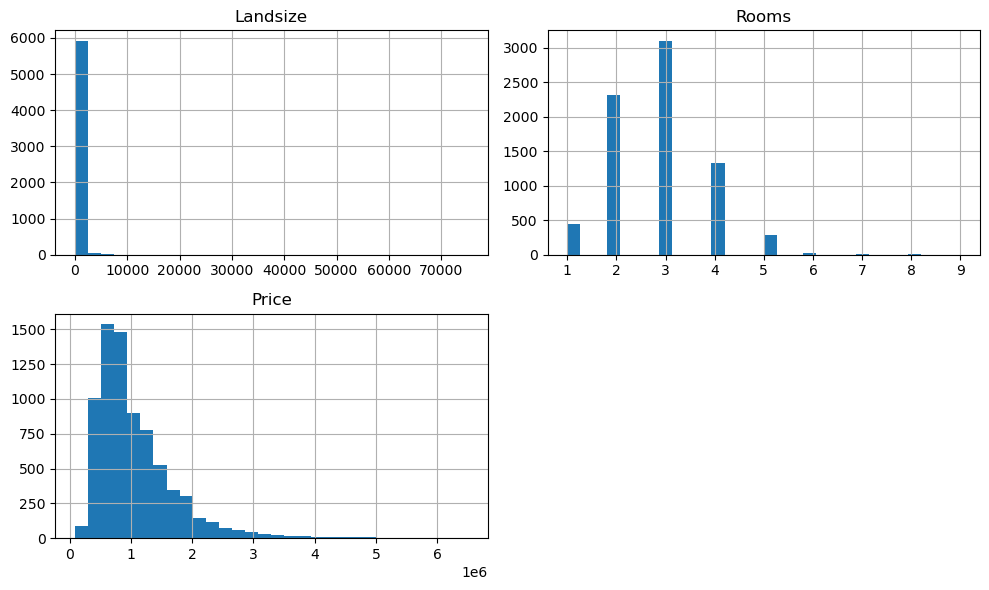

In [47]:
# Distribution plots
numerical_cols = ['Landsize', 'Rooms', 'Price']
df[numerical_cols].hist(bins=30, figsize=(10,6))
plt.tight_layout()
plt.show()

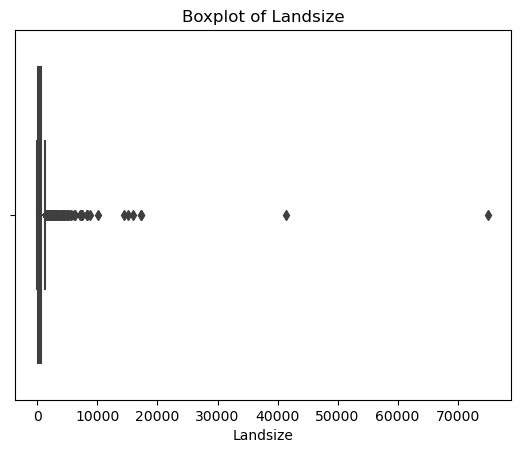

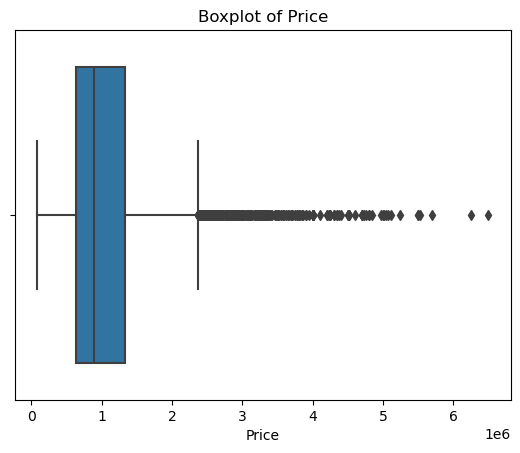

In [48]:
# Boxplots to check for outliers
for col in ['Landsize', 'Price']:
    plt.figure()
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

## 2.2 Data Preprocessing
### Normalize numerical data and encode categorical features

In [49]:
from sklearn.preprocessing import StandardScaler

# Fill missing Landsize values with median
df['Landsize'].fillna(df['Landsize'].median(), inplace=True)

# Encode categorical Location using one-hot encoding
df = pd.get_dummies(df, columns=['Location'], drop_first=False)

# Separate features and target
X = df.drop(columns=['Price'])
y = df['Price']

# Normalize numeric features
scaler = StandardScaler()
X[['Landsize', 'Rooms']] = scaler.fit_transform(X[['Landsize', 'Rooms']])
X.head()

,Landsize,Rooms,Location_Rural,Location_Suburban,Location_Urban
0,0.058444,0.162207,False,True,False
1,0.458556,2.244652,False,True,False
2,-0.207725,0.162207,False,True,False
3,-0.083656,-0.879015,False,True,False
4,0.283400,2.244652,False,True,False


## 2.3  Feature Selection
### Correlation analysis to identify impactful predictors

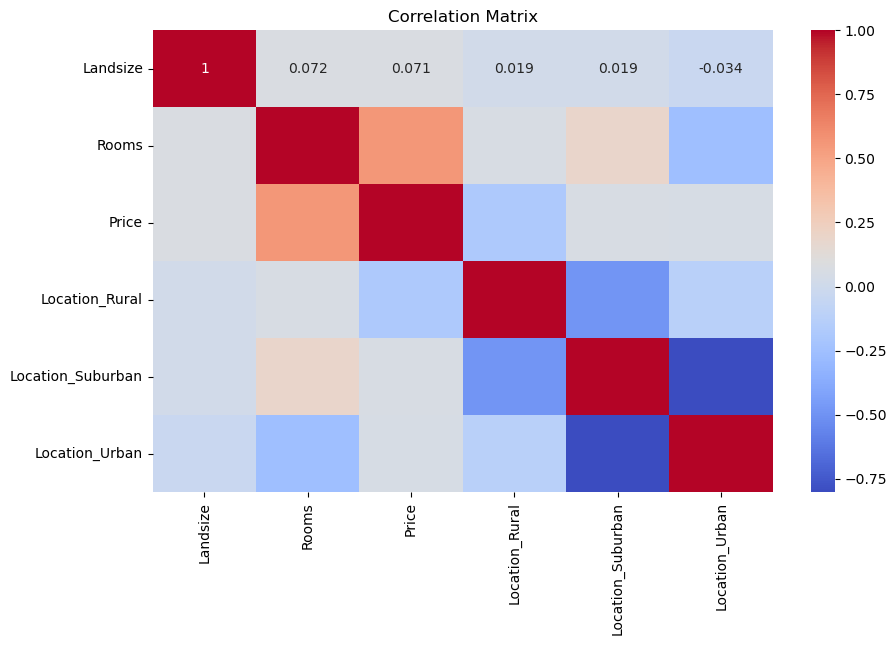

In [50]:
# Add Price back to check correlations
corr_df = df.copy()
corr_df[['Landsize', 'Rooms']] = scaler.inverse_transform(X[['Landsize', 'Rooms']])
corr_df['Price'] = y

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 2.4 Model Training

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 2.5  Model Evaluation

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Root Mean Squared Error (RMSE): 490579.95
R² Score: 0.4113


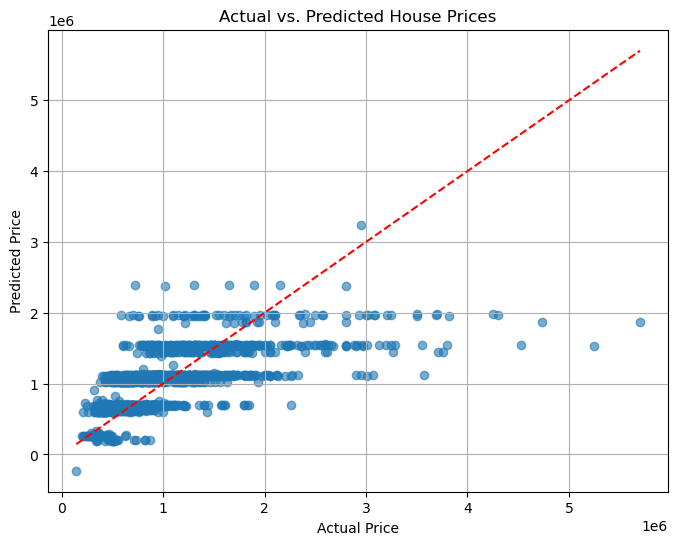

In [53]:
# Actual vs Predicted plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

## Summary – House Price Regression Model

### 1. Trained Regression Model
- A **Linear Regression** model was trained using:
  - `Landsize` (Property Size)
  - `Rooms` (Number of Rooms)
  - `Location` (One-hot encoded: Urban, Suburban, Rural)

---

### 2. Predictions
- Predictions were generated on the test dataset.
- A scatter plot was created showing **actual vs. predicted prices** to visualize accuracy.

---

### 3. Evaluation Metrics
- **Root Mean Squared Error (RMSE):** ₹490,580  
- **R² Score:** 0.4113  
> Interpretation: About 41% of the variance in house prices is explained by the model. While this provides a decent baseline, further feature engineering may improve performance.

---

### 4. Feature Insights
- **Rooms**: Strongest positive correlation with house price.
- **Landsize**: Contributes moderately to price; large outliers may influence model.
- **Location**:
  - Urban homes command higher prices.
  - Suburban prices vary based on neighborhood.
  - Rural homes tend to be more affordable.

